# Проект: Прогнозирование выживаемости стартапов: анализ факторов успеха

#### **Введение**

В современном мире стартапы играют важную роль в экономике, инновациях и создании новых рабочих мест. Однако высокая степень неопределенности в их жизни делает предсказание их успешности сложной задачей. В этом проекте мы стремимся разработать модель машинного обучения, которая будет предсказывать, закроется ли стартап или продолжит свою деятельность.

Данные, используемые в проекте, представляют собой информацию о стартапах, собранную за период с 1970 по 2018 годы. Эти данные содержат как реальные, так и синтетические элементы, что делает их почти идеальными для анализа и обучения моделей.

#### **Описание проекта и данных**

Проект состоит из следующих файлов данных:
- **kaggle_startups_train_01.csv**: тренировочный набор данных с информацией о стартапах (около 53,000 записей), включая целевой признак `status`, который показывает, закрылся стартап или продолжает действовать.
- **kaggle_startups_test_01.csv**: тестовый набор данных (около 13,000 записей), для которого необходимо предсказать значение `status`.

#### **Описание полей данных**
- **name**: Название стартапа.
- **category_list**: Список категорий, к которым относится стартап.
- **funding_total_usd**: Общая сумма финансирования в USD.
- **status**: Статус стартапа (закрыт или действующий).
- **country_code**: Код страны.
- **state_code**: Код штата.
- **region**: Регион.
- **city**: Город.
- **funding_rounds**: Количество раундов финансирования.
- **founded_at**: Дата основания.
- **first_funding_at**: Дата первого раунда финансирования.
- **last_funding_at**: Дата последнего раунда финансирования.
- **closed_at**: Дата закрытия стартапа (если применимо).
- **lifetime**: Время существования стартапа в днях.

#### **Цели проекта**
1. Разработать модель машинного обучения для предсказания продолжения деятельности стартапа.
2. Провести полноценный разведочный анализ и сформировать рекомендации для будущих создателей стартапов о факторах, влияющих на успешность.

#### **Задачи проекта**
1. [x] Загрузка и ознакомление с данными.
2. [x] Предварительная обработка данных, включая обработку пропусков и категориальных признаков.
3. [x] Проведение разведочного анализа данных (EDA).
4. [ ] Создание новых синтетических признаков для улучшения модели.
5. [ ] Проверка на мультиколлинеарность и отбор финального набора признаков.
6. [ ] Выбор и обучение моделей машинного обучения для предсказания `status`.
7. [ ] Оценка качества предсказаний с использованием метрики F1-Score.
8. [ ] Анализ важности признаков модели и формулирование рекомендаций.

#### **Примерный план действий** удалить перед сдачей
1. **Загрузка данных**:
   - Импортировать необходимые библиотеки и загрузить датасеты.
   
2. **Предварительная обработка данных**:
   - Обработать пропуски и преобразовать категориальные признаки в числовые.

3. **Разведочный анализ данных**:
   - Визуализировать распределение признаков и их взаимосвязи.
   - Определить ключевые факторы, влияющие на успешность стартапов.

4. **Создание новых признаков**:
   - На основе имеющихся данных создать новые синтетические признаки, которые могут улучшить модель.

5. **Моделирование**:
   - Выбрать несколько моделей для обучения (например, логистическая регрессия, градиентный бустинг).
   - Обучить модели и оценить их производительность.

6. **Оценка качества**:
   - Использовать F1-Score для оценки качества предсказаний и выбрать лучшую модель.

7. **Анализ важности признаков**:
   - Проанализировать, какие признаки наибольшим образом способствуют предсказанию успешности стартапа.

8. **Подготовка отчета**:
   - Подготовить отчет по исследованию, включая визуализации и рекомендации для стартапов.

## Загрузка данных и импорт необходимых библиотек

In [1]:
!pip install phik
!pip install shap
!pip install --upgrade scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_auc_score
import phik
import shap
import missingno as msno

## Изучение общей информации о полученном датафрейме

### Загрузка данных

In [3]:
try:
    train = pd.read_csv(r'D:\dev\study\practicum\14. Мастерская\practice\datasets\kaggle_startups_train_28062024.csv')
    test = pd.read_csv(r'D:\dev\study\practicum\14. Мастерская\practice\datasets\kaggle_startups_test_28062024.csv')
except Exception as e:
    print(f"Произошла ошибка: {e}")

Данные загружены успешно, все библиотеки импортированы.

### Изучение данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               52515 non-null  object 
 1   category_list      50051 non-null  object 
 2   funding_total_usd  42447 non-null  float64
 3   status             52516 non-null  object 
 4   country_code       47014 non-null  object 
 5   state_code         45753 non-null  object 
 6   region             46157 non-null  object 
 7   city               46157 non-null  object 
 8   funding_rounds     52516 non-null  int64  
 9   founded_at         52516 non-null  object 
 10  first_funding_at   52516 non-null  object 
 11  last_funding_at    52516 non-null  object 
 12  closed_at          4917 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 5.2+ MB


None

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
0,Lunchgate,Online Reservations|Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,NaN
1,EarLens,Manufacturing|Medical|Medical Devices,42935019.0,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,NaN
2,Reviva Pharmaceuticals,Biotechnology,35456381.0,operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,NaN
3,Sancilio and Company,Health Care,22250000.0,operating,NaN,NaN,NaN,NaN,3,2004-01-01,2011-09-01,2014-07-18,NaN
4,WireTough Cylinders,Manufacturing,NaN,operating,USA,VA,VA - Other,Bristol,1,2010-05-12,2012-02-01,2012-02-01,NaN


,funding_total_usd,funding_rounds
count,4.244700e+04,52516.000000
mean,1.824748e+07,1.740670
std,1.871173e+08,1.374522
min,1.000000e+00,1.000000
25%,3.360275e+05,1.000000
50%,2.000000e+06,1.000000
75%,1.000000e+07,2.000000
max,3.007950e+10,19.000000


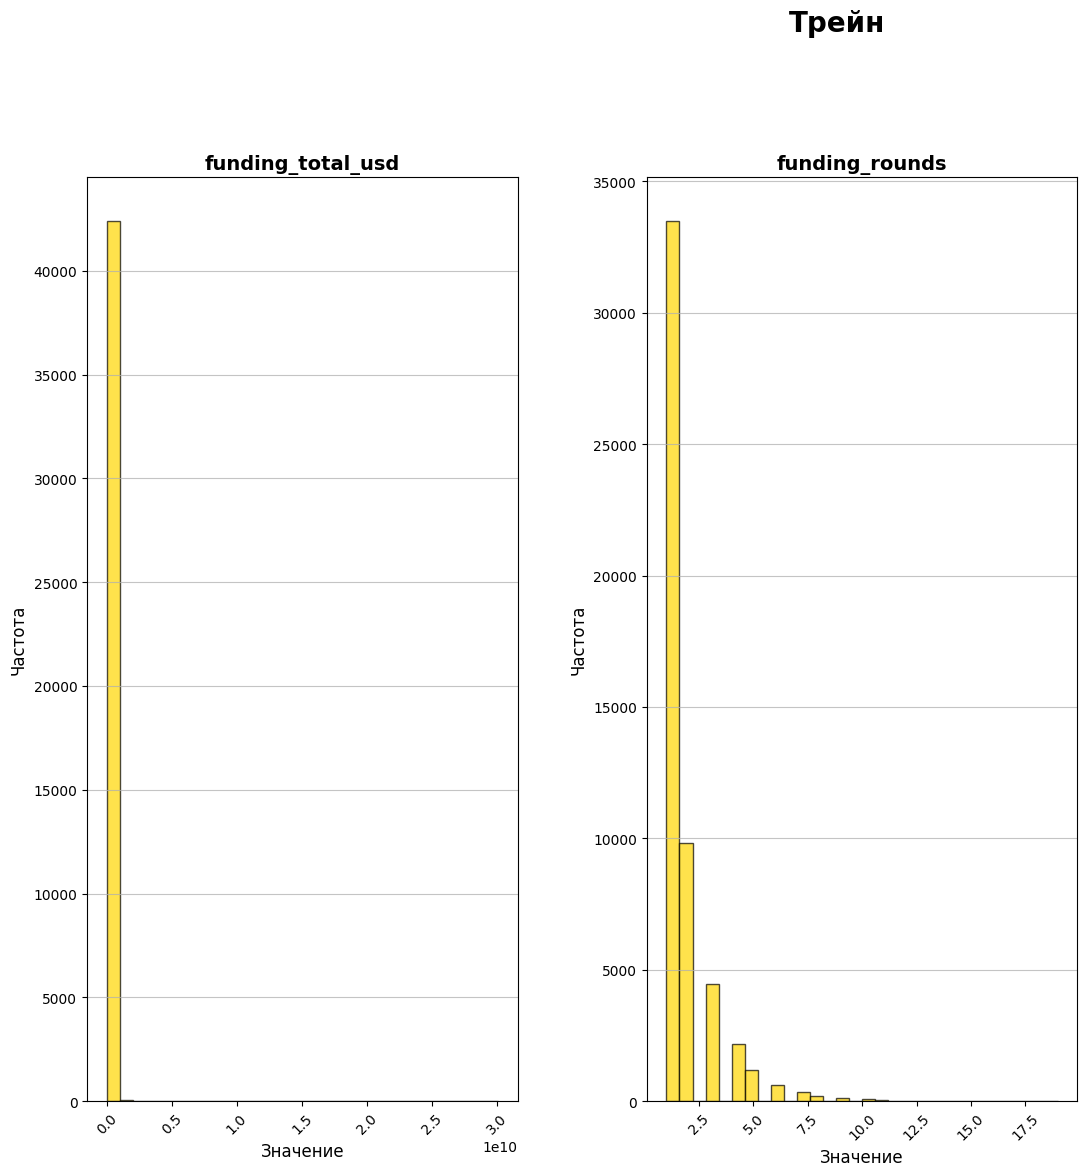

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               13125 non-null  object 
 1   category_list      12534 non-null  object 
 2   funding_total_usd  10547 non-null  float64
 3   country_code       11743 non-null  object 
 4   state_code         11430 non-null  object 
 5   region             11536 non-null  object 
 6   city               11538 non-null  object 
 7   funding_rounds     13125 non-null  int64  
 8   first_funding_at   13125 non-null  object 
 9   last_funding_at    13125 non-null  object 
 10  lifetime           13125 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.1+ MB


None

,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime
0,Crystalsol,Clean Technology,2819200.0,NIC,17,NaN,NaN,1,2009-07-01,2009-07-01,3501
1,JBI Fish & Wings,Hospitality,NaN,USA,TN,TN - Other,Humboldt,1,2010-07-28,2010-07-28,2717
2,COINPLUS,Finance,428257.0,LUX,3,Esch-sur-alzette,Esch-sur-alzette,2,2014-05-15,2014-09-18,1295
3,Imagine Communications,Software|Video|Video Streaming,34700000.0,USA,CA,San Diego,San Diego,4,2005-01-01,2010-04-20,4748
4,DNA13,Software,4530000.0,CAN,ON,Ottawa,Ottawa,1,2007-05-08,2007-05-08,6209


,funding_total_usd,funding_rounds,lifetime
count,1.054700e+04,13125.000000,13125.000000
mean,1.654910e+07,1.714438,3097.609524
std,9.217283e+07,1.318800,2128.356554
min,1.000000e+00,1.000000,52.000000
25%,3.200000e+05,1.000000,1726.000000
50%,2.000000e+06,1.000000,2526.000000
75%,1.000000e+07,2.000000,3866.000000
max,4.715000e+09,15.000000,17167.000000


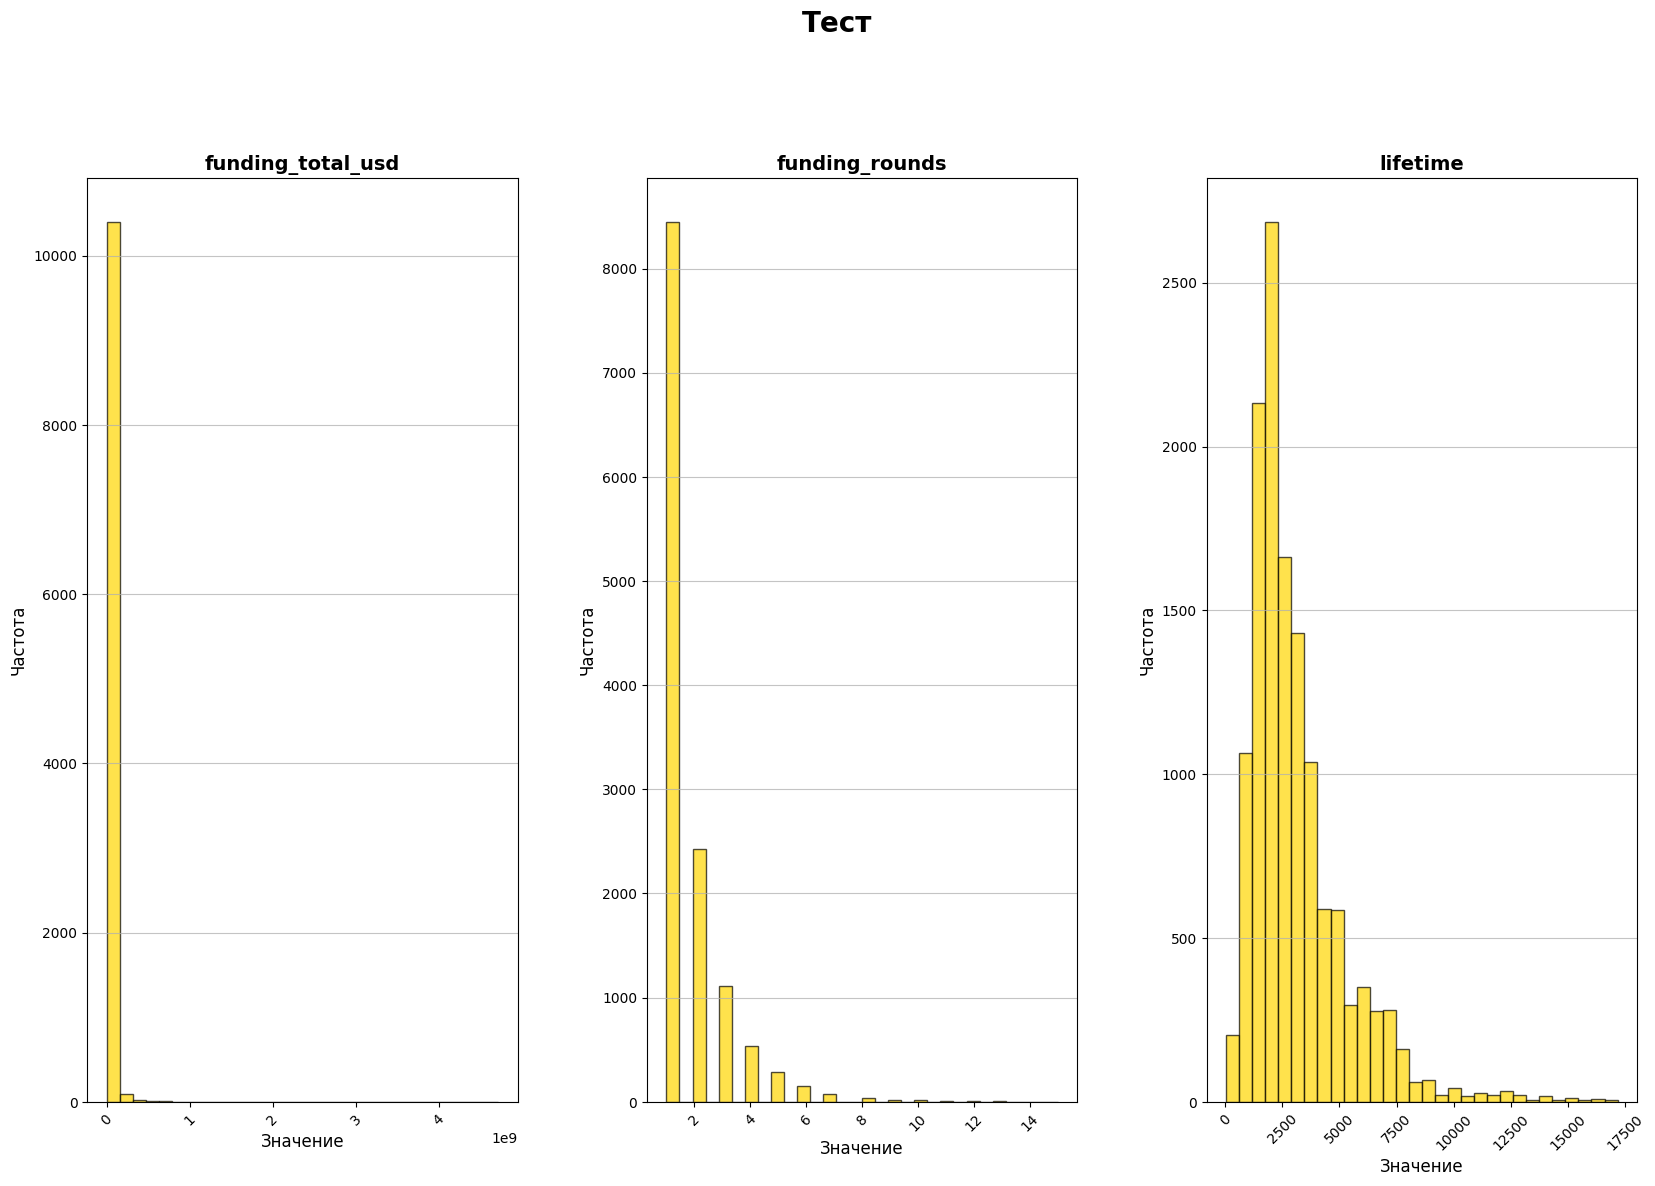

In [4]:
def check_df(df, title):
    # информация о дф
    display(df.info())
    # первые 5 строк
    display(df.head())
    # описательная статистика
    display(df.describe())

    # извлечение только числовых столбцов
    numeric_df = df.select_dtypes(include=['number'])

    if numeric_df.empty:
        print('нет числовых значений')
        return

    # гистограммы
    num_plots = len(numeric_df.columns)
    plt.figure(figsize=(20, 12))
    for i in range(num_plots):
        plt.subplot((num_plots + 2) // 3, 3, i + 1)
        plt.hist(numeric_df.iloc[:, i], bins=30, color='gold', edgecolor='black', alpha=0.7)
        plt.title(numeric_df.columns[i], fontsize=14, fontweight='bold')
        plt.xlabel('Значение', fontsize=12)
        plt.ylabel('Частота', fontsize=12)
        plt.xticks(rotation=45, fontsize=10)
        plt.yticks(fontsize=10)
        plt.grid(axis='y', alpha=0.75)

    plt.suptitle(title, fontsize=20, fontweight='bold', y=1.02)
    plt.subplots_adjust(wspace=0.3, hspace=0.5)
    plt.show()


check_df(train, title="Трейн")
check_df(test, title="Тест")

### Вывод по изучению данных

*1. Общая информация*

1. **Объем данных**:
   - **Обучающая выборка**: 52,516 записей и 13 столбцов.
   - **Тестовая выборка**: 13,125 записей и 11 столбцов.

2. **Структура данных**:
   - Обучающая выборка включает столбцы:
     - `name`
     - `category_list`
     - `funding_total_usd`
     - `status`
     - `country_code`
     - `state_code`
     - `region`
     - `city`
     - `funding_rounds`
     - `founded_at`
     - `first_funding_at`
     - `last_funding_at`
     - `closed_at`
   - Тестовая выборка включает столбцы:
     - `name`
     - `category_list`
     - `funding_total_usd`
     - `country_code`
     - `state_code`
     - `region`
     - `city`
     - `funding_rounds`
     - `first_funding_at`
     - `last_funding_at`
     - `lifetime`

*2. Пропуски и неполные данные*

1. **Обучающая выборка**:
   - Пропуски в столбцах:
     - `category_list`: 1,465
     - `funding_total_usd`: 12,069
     - `country_code`: 8,502
     - `state_code`: 8,763
     - `region`: 3,359
     - `city`: 3,359
     - `closed_at`: 47,599
   - Наиболее значительные пропуски в `funding_total_usd`, `country_code`, и `state_code`.

2. **Тестовая выборка**:
   - Пропуски в столбцах:
     - `category_list`: 5,591
     - `funding_total_usd`: 7,578
     - `country_code`: 1,382
     - `state_code`: 695
     - `region`: 589
     - `city`: 587

*3. Статистический анализ*

1. **Обучающая выборка**:
   - `funding_total_usd`:
     - Среднее значение: ~18,247,480 USD
     - Минимальное значение: 1 USD
     - Максимальное значение: 30,079,500,000 USD
     - Стандартное отклонение: 186,117,300 USD
   - `funding_rounds`:
     - Среднее значение: ~1.74
     - Максимум: 19

2. **Тестовая выборка**:
   - `funding_total_usd`:
     - Среднее значение: ~16,549,100 USD
     - Минимальное значение: 1 USD
     - Максимальное значение: 4,715,000,000 USD
   - `funding_rounds`:
     - Среднее значение: ~1.71
     - Максимум: 15

*4. Временные характеристики*

- Обучающая выборка включает даты:
  - `founded_at`
  - `first_funding_at`
  - `last_funding_at`
  - `closed_at`
- Тестовая выборка включает даты:
  - `first_funding_at`
  - `last_funding_at`
  - `lifetime`

*5. Выводы и рекомендации*

1. **Обработка пропусков**:
   - Провести анализ пропусков и определить, как с ними поступить (удалить, заполнить средней или медианой).

2. **Классификация стартапов**:
   - Столбец `category_list` может быть полезен для кластеризации и анализа по категориям.

3. **Моделирование**:
   - Учитывать временные характеристики при создании моделей предсказания.
  
4. **Рекомендации по замене типов данных**:
  - Обучающая выборка (`train`)
    - **founded_at**: преобразовать в `datetime`.
    - **first_funding_at**: преобразовать в `datetime`.
    - **last_funding_at**: преобразовать в `datetime`.
    - **closed_at**: преобразовать в `datetime` (учесть возможные `NaN`).

  - Тестовая выборка (`test`)
    - **first_funding_at**: преобразовать в `datetime`.
    - **last_funding_at**: преобразовать в `datetime`.

## Предобработка данных

### Обработка дубликатов

#### Обработка неявных дубликатов

In [5]:
def preprocess_column(column):
    return (column.str.lower()
     .str.replace('_', ' ', regex=False)
     .str.replace('|', ' ', regex=False))

def display_value_counts(df, columns):
    for column in columns:
        df[column] = preprocess_column(df[column])
        
        # выделение заголовка поля
        print(f'**{column}**')
        display(df[column].value_counts())
        print('*************************************')
        
    print('_____________________________________')

# для обучающей выборки
display_value_counts(train, [
    'name',
    'category_list',
    'status',
    'country_code',
    'state_code',
    'region',
    'city'
])

**name**


name
meetapp          2
sip              2
genomed          2
stride health    2
sidestep         2
                ..
videostream      1
hello curry      1
taskforce        1
netscaler        1
apparcando       1
Name: count, Length: 52472, dtype: int64

*************************************
**category_list**


category_list
software                                                                        3207
biotechnology                                                                   2905
e-commerce                                                                      1064
mobile                                                                           920
clean technology                                                                 892
                                                                                ... 
anything capital intensive news trading                                            1
cloud computing financial services investment management                           1
big data analytics business services reputation sales and marketing software       1
business services design user experience design web design                         1
analytics enterprises enterprise software software                                 1
Name: count, Length: 22091, dtype: int64

*************************************
**status**


status
operating    47599
closed        4917
Name: count, dtype: int64

*************************************
**country_code**


country_code
usa    29702
gbr     2925
can     1540
ind     1276
chn     1240
       ...  
brn        1
som        1
mne        1
syc        1
zmb        1
Name: count, Length: 134, dtype: int64

*************************************
**state_code**


state_code
ca    10219
ny     3112
ma     2020
tx     1562
h9     1510
      ...  
m8        1
j3        1
nu        1
v5        1
u6        1
Name: count, Length: 300, dtype: int64

*************************************
**region**


region
sf bay area        6970
new york city      2776
boston             1890
london             1840
los angeles        1513
                   ... 
tgo - other           1
new westminster       1
haywards heath        1
herzogenaurach        1
doncaster             1
Name: count, Length: 1036, dtype: int64

*************************************
**city**


city
san francisco      2824
new york           2486
london             1514
austin              609
palo alto           607
                   ... 
lauderhill            1
talent                1
peru                  1
north arlington       1
lansdowne             1
Name: count, Length: 4477, dtype: int64

*************************************
_____________________________________


В целом, неявные дубликаты не обнаружены, но на данный момент меня смущает наличие почти 23 тысяч уникальных значений в поле `category_list`

#### Обработка явных дубликатов

In [6]:
# посчитаю количество пропусков и дубликатов в каждом столбце
def analyze_dataframe(df, df_name):
    print(f'Анализ: {df_name}')
    
    # количество пропусков в каждом столбце
    missing_values = df.isnull().sum()
    
    # доля пропущенных значений в процентах
    missing_percentage = (missing_values / len(df)) * 100
    
    # помещение в датафрейм
    missing_df = pd.DataFrame({'Количество пропусков': missing_values, 'Доля, %': missing_percentage})
    
    # сортировка по убыванию доли пропусков
    missing_df = missing_df.sort_values(by='Доля, %', ascending=False)
    
    print('Количество пропусков в каждом столбце:')
    display(missing_df)
    
    # количество дубликатов
    print('Дубликаты:', df.duplicated().sum())
    print()

analyze_dataframe(train, 'train')

Анализ: train
Количество пропусков в каждом столбце:


,Количество пропусков,"Доля, %"
closed_at,47599,90.637139
funding_total_usd,10069,19.173204
state_code,6763,12.877980
region,6359,12.108691
city,6359,12.108691
country_code,5502,10.476807
category_list,2465,4.693808
name,1,0.001904
status,0,0.000000
funding_rounds,0,0.000000


Дубликаты: 0



- Обнаружено много пропусков в данных.
- Заполнять пропуски буду с помощью простых моделей машинного обучения без применения :
  - Поля с типом данных `float`, такие как `funding_total_usd` заполню с помощью `линейной регрессии`.
  - Категориальные поля заполню с помощью предсказаний модели `KNN`.
- Поле с датой `closed_at` заполню заполню значением из поля `last_funding_at`, к которому прибавили один год, и при этом установлю `NaT` для тех строк, где в поле `status` стоит значение `operating`, так как действующие компании не могут быть закрытыми.
- Пропуск в поле name заполню значением `unknown`

### Анализ и обработка пропусков

Соберу все пропуски в одной переменной

In [7]:
missing_values = train.isnull().sum()
missing_percentage = (missing_values / len(train)) * 100
missing_df = pd.DataFrame({'Количество пропусков': missing_values, 'Доля, %': missing_percentage})
missing_df = missing_df[missing_df['Количество пропусков'] > 0]
missing_df = missing_df.sort_values(by='Доля, %', ascending=False)

Далее проведу анализ пропущенных значений и попытаюсь выяснить, почему же их так много

<Figure size 1000x600 with 0 Axes>

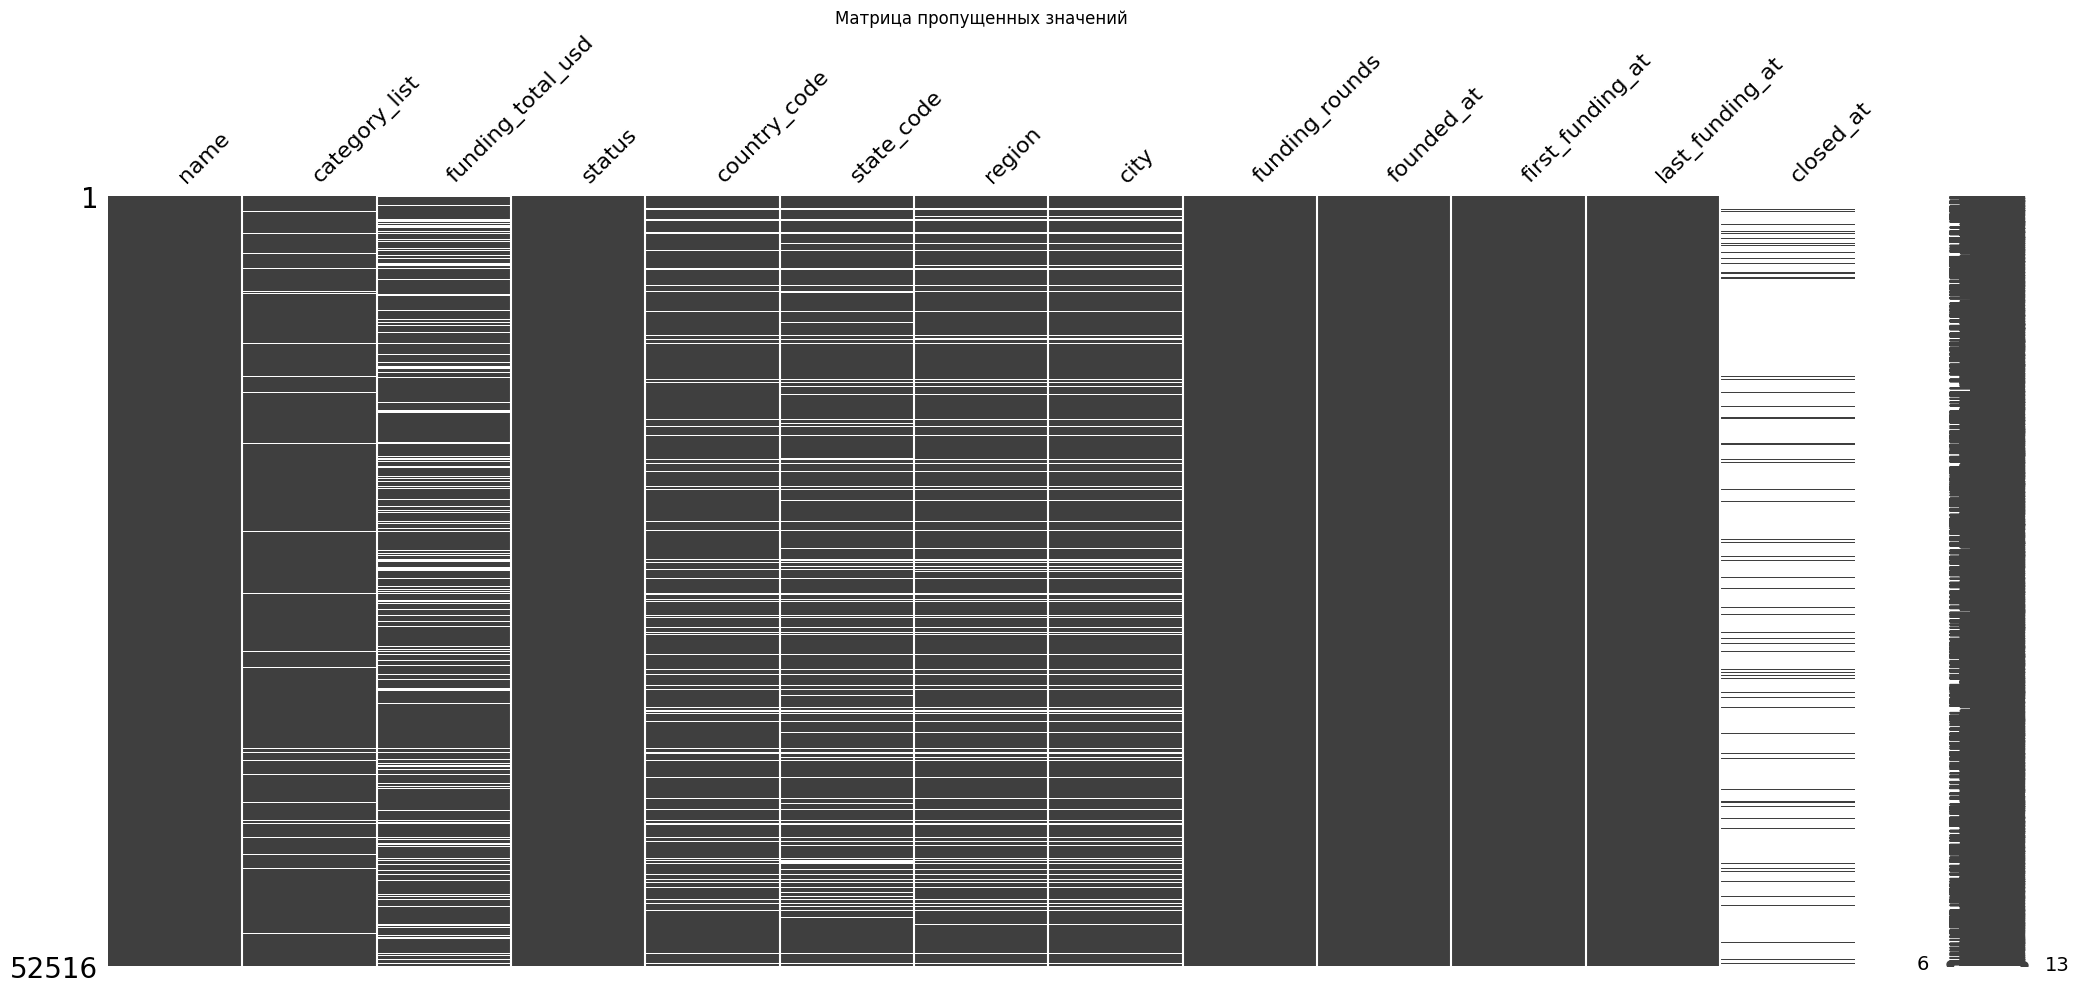

In [8]:
# визуализация пропусков

# матрица пропущенных значений
plt.figure(figsize=(10, 6))
msno.matrix(train)
plt.title("Матрица пропущенных значений")
plt.show()

Пропуски распределены равномерно по всему датасету, но нельзя не заметить сквозные линии пропусков в столбцах `country_code - state_code - region - city`. Это может говорить о том, что пропуски имеют связь и присутсвуют только в определнных строках. Нужно посмотреть на корреляцию признаков, в которых присутсвуют пропуски

<Figure size 1000x600 with 0 Axes>

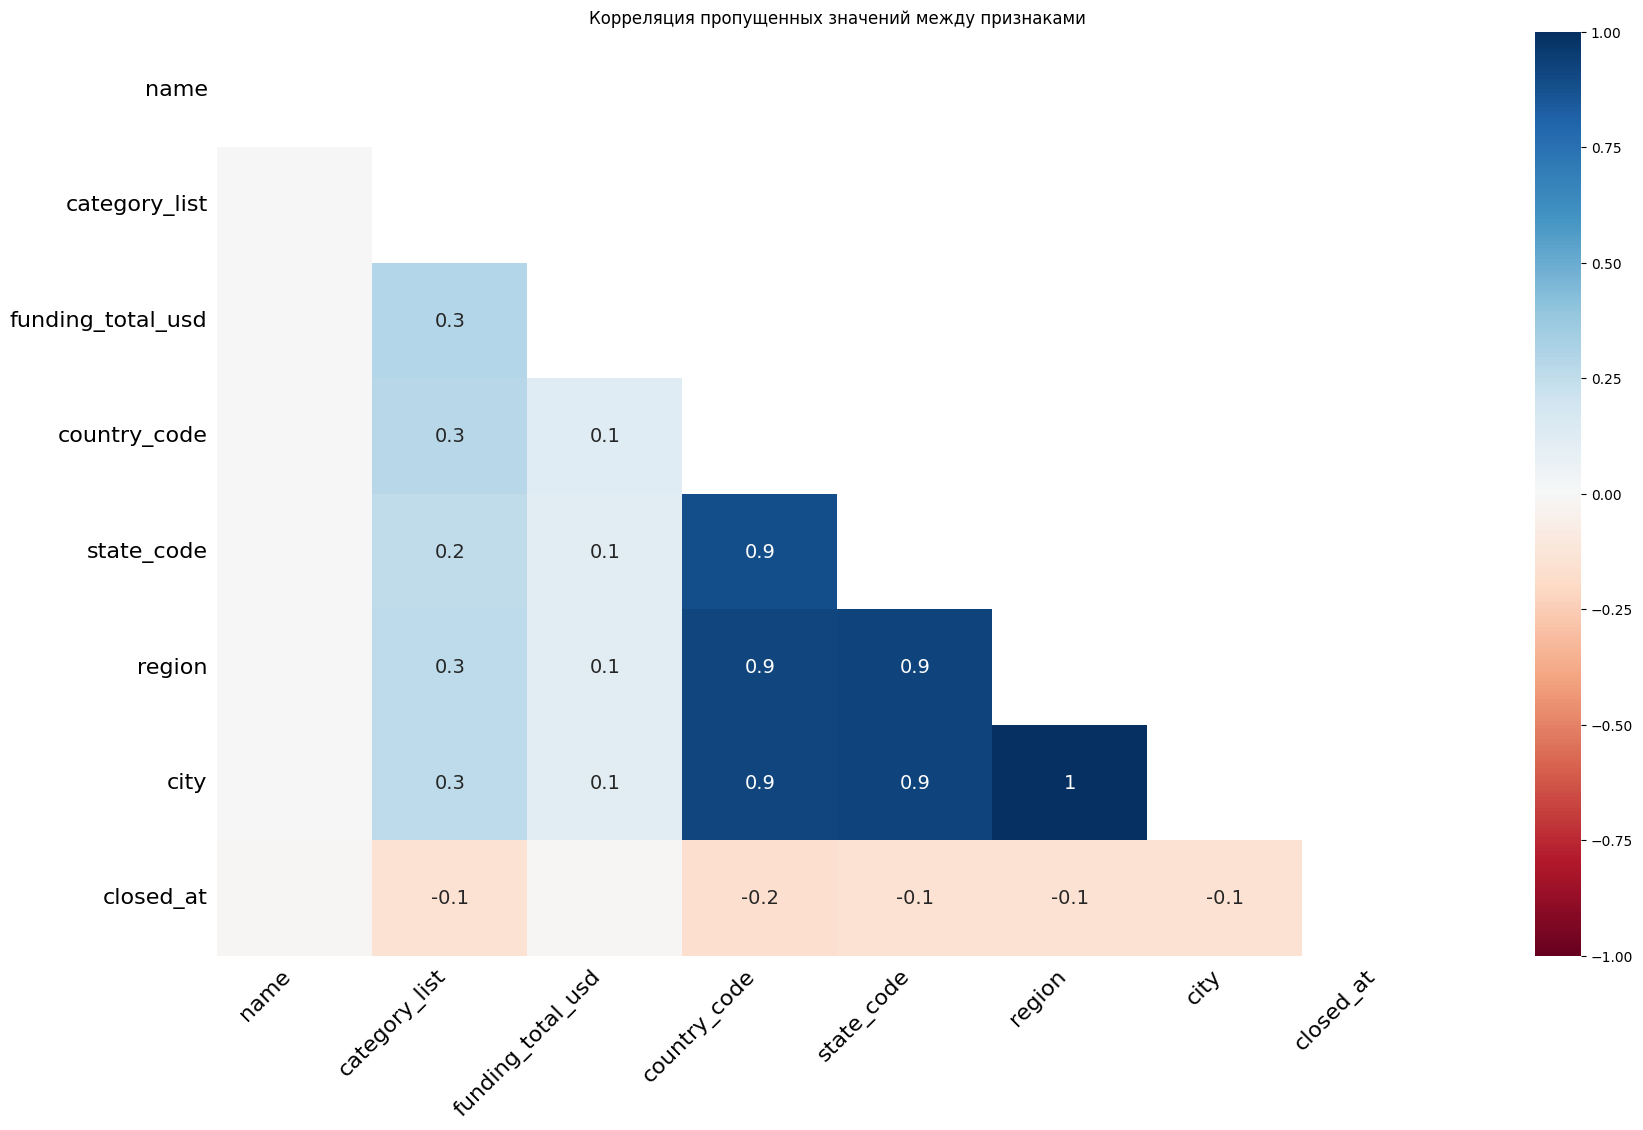

In [9]:
# тепловая карта пропущенных значений (для выявления зависимостей)
plt.figure(figsize=(10, 6))
msno.heatmap(train)
plt.title("Корреляция пропущенных значений между признаками")
plt.show()

Предположение о наличии связи между полями `country_code - state_code - region - city` подтвердилось, корреляция между ними очень сильная, более того, здесь наблюдается мультиколлинеарность и полная линейная зависимость признаков `region - city`. Это может говорить о синтетическом происхождении одного из полей, значит, один из этих столбцов можно удалить или обнулить без потери в качестве данных.

Посмотрю на распределение пропусков по целевому признаку ниже

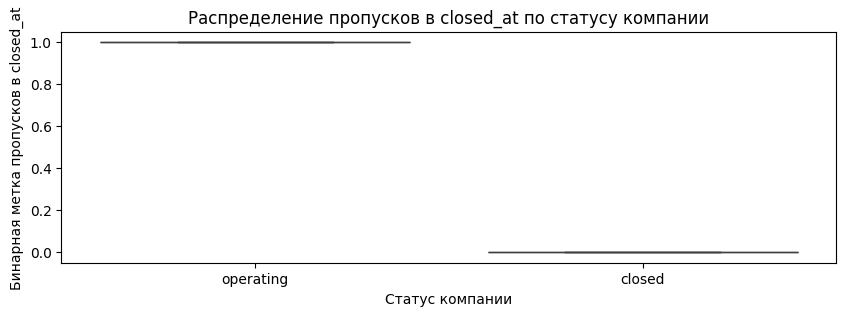

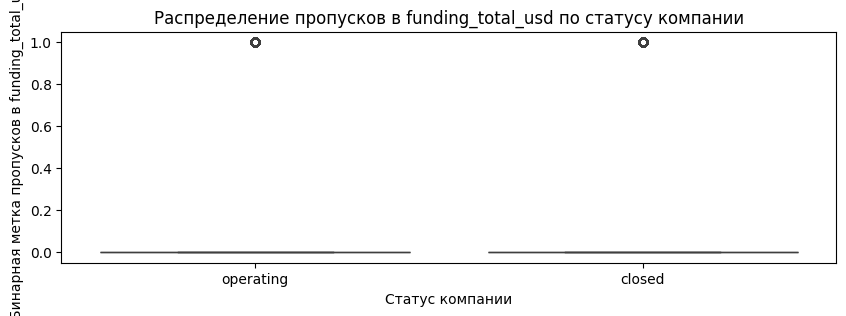

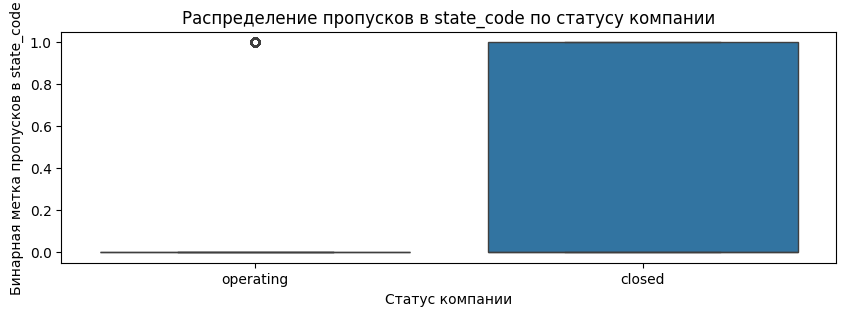

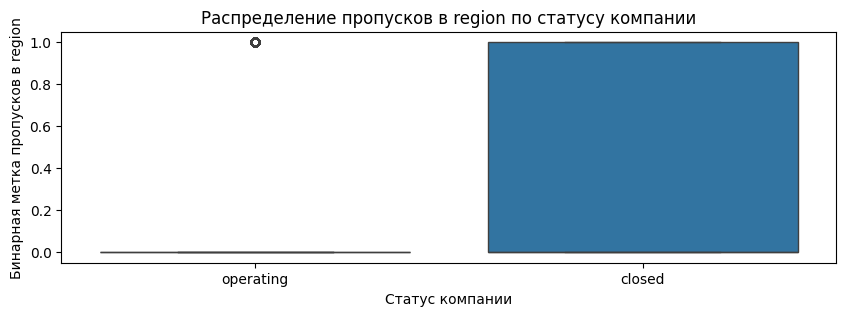

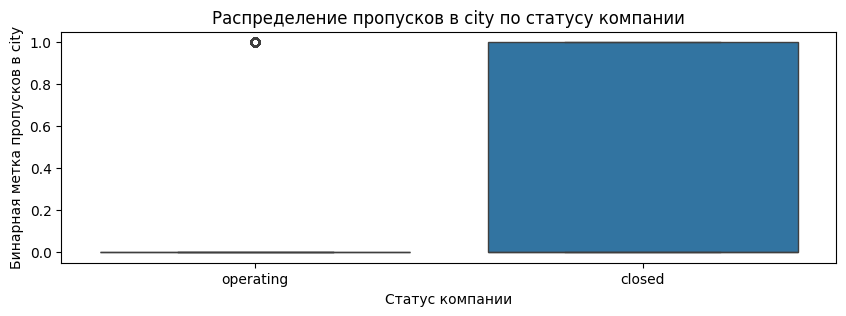

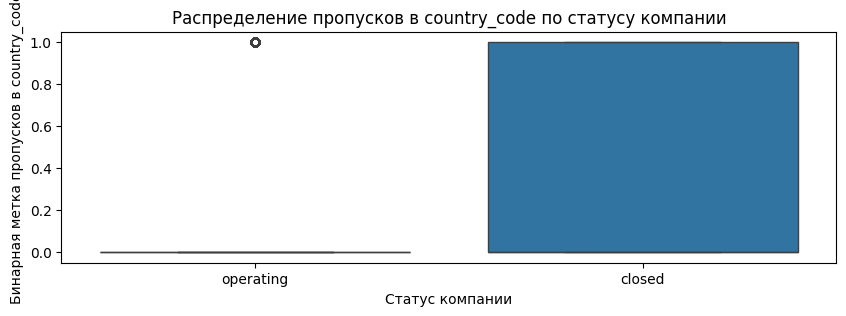

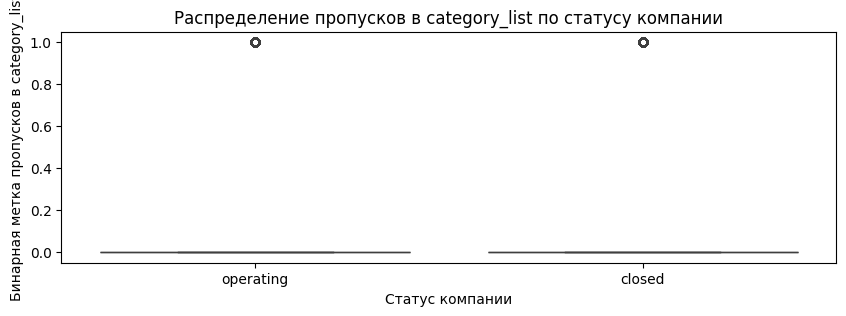

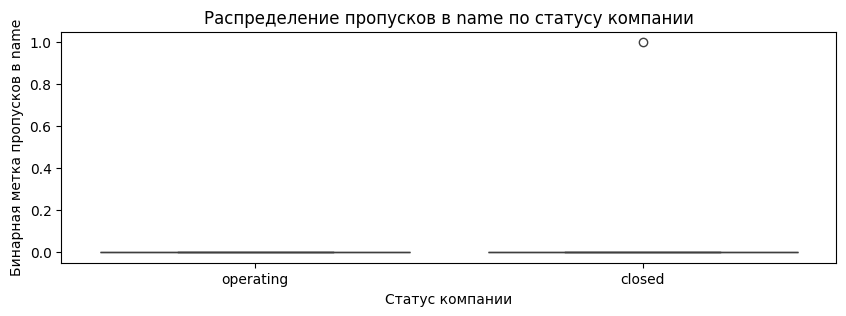

In [10]:
# добавлю бинарную метку пропущенных значений для каждого столбца
for col in missing_df.index:
    train[f"{col}_missing"] = train[col].isnull().astype(int)

# анализ распределения пропусков по категориям
categorical_cols = ['status', 'country_code', 'state_code', 'region', 'city']
for col in missing_df.index:
    plt.figure(figsize=(10, 3))
    sns.boxplot(x='status', y=f"{col}_missing", data=train)
    plt.title(f"Распределение пропусков в {col} по статусу компании")
    plt.xlabel('Статус компании')
    plt.ylabel(f"Бинарная метка пропусков в {col}")
    plt.show()

Боксплот показывает, что почти все пропуски находятся в строках с уже заркытыми компаниями.

Посмотрю, пропуски в каких столбцах встречаются одновременно

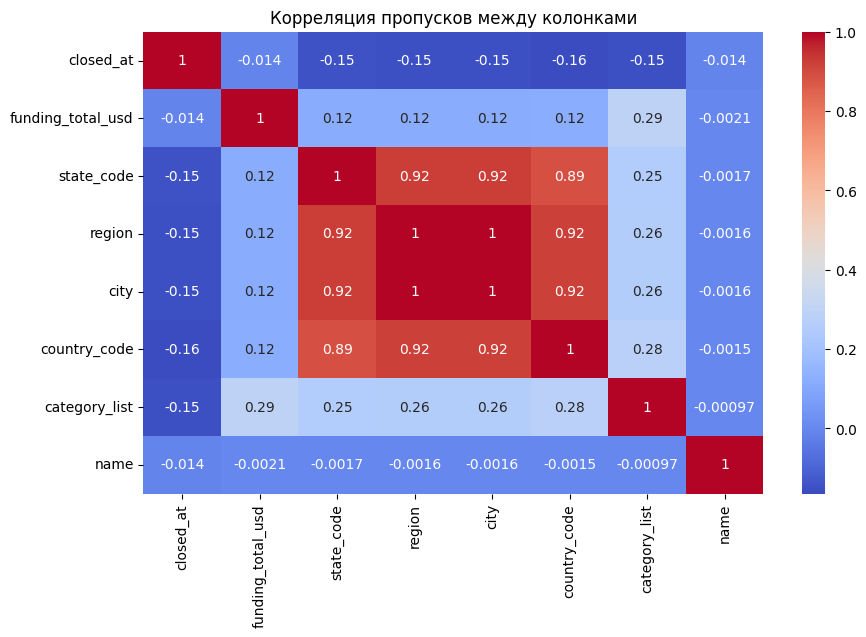

In [11]:
# корреляция между пропусками разных колонок
plt.figure(figsize=(10, 6))
sns.heatmap(train[missing_df.index].isnull().corr(), annot=True, cmap='coolwarm')
plt.title("Корреляция пропусков между колонками")
plt.show()


In [12]:
analyze_dataframe(train, 'train')

Анализ: train
Количество пропусков в каждом столбце:


,Количество пропусков,"Доля, %"
closed_at,47599,90.637139
funding_total_usd,10069,19.173204
state_code,6763,12.877980
region,6359,12.108691
city,6359,12.108691
country_code,5502,10.476807
category_list,2465,4.693808
name,1,0.001904
status,0,0.000000
funding_rounds,0,0.000000


Дубликаты: 0



Анализ пропусков показал, что 

#### Заполнение поля funding_total_usd

In [13]:
# разделю данные на обучающую и тестовую выборки
# в тестовую выборку войдут все значения с пропусками, чтобы их предсказывать
train_data_funding_total_usd = train[train['funding_total_usd'].notnull()]
test_data_funding_total_usd = train[train['funding_total_usd'].isnull()]

In [14]:
# определю признаки и целевую переменную
X_train_funding_total_usd = train_data_funding_total_usd.drop(columns=['funding_total_usd'])
y_train_funding_total_usd = train_data_funding_total_usd['funding_total_usd']

In [15]:
# преобразую категориальные и числовые переменные
categorical_cols = X_train_funding_total_usd.select_dtypes(include=['object']).columns
numerical_cols = X_train_funding_total_usd.select_dtypes(exclude=['object']).columns

# пайплайн для обработки данных
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ]
)

In [16]:
# общий пайплайн с линейной регрессией
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [17]:
# обучение модели и предсказание
model.fit(X_train_funding_total_usd, y_train_funding_total_usd)

# предсказание
X_test_funding_total_usd = test_data_funding_total_usd.drop(columns=['funding_total_usd'])
predictions = model.predict(X_test_funding_total_usd)

In [18]:
train.loc[train['funding_total_usd'].isnull(), 'funding_total_usd'] = predictions

analyze_dataframe(train, 'train')

Анализ: train
Количество пропусков в каждом столбце:


,Количество пропусков,"Доля, %"
closed_at,47599,90.637139
state_code,6763,12.877980
city,6359,12.108691
region,6359,12.108691
country_code,5502,10.476807
category_list,2465,4.693808
name,1,0.001904
status,0,0.000000
funding_total_usd,0,0.000000
funding_rounds,0,0.000000


Дубликаты: 0



Заполнение пропусков с применением моделирования прошло успешно, пропусков больше нет, а все значения должны быть максимально близки к реальности, т.к. применялась модель МО.

In [19]:
analyze_dataframe(train, 'train')

Анализ: train
Количество пропусков в каждом столбце:


,Количество пропусков,"Доля, %"
closed_at,47599,90.637139
state_code,6763,12.877980
city,6359,12.108691
region,6359,12.108691
country_code,5502,10.476807
category_list,2465,4.693808
name,1,0.001904
status,0,0.000000
funding_total_usd,0,0.000000
funding_rounds,0,0.000000


Дубликаты: 0



#### Заполнение category_list

In [20]:
# функция для заполнения пропусков в указанном столбце
def fill_missing_values(df, column_name):
    # разделение данных на обучающую и тестовую выборки
    train_data = df[df[column_name].notnull()]
    test_data = df[df[column_name].isnull()]

    if test_data.empty:
        print(f"нет пропусков в столбце '{column_name}'.")
        return  # если нет пропусков, выходим из функции

    # определение признаков и целевой переменной
    X_train = train_data.drop(columns=[column_name])
    y_train = train_data[column_name]

    # преобразование категориальных и числовых переменных
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), X_train.select_dtypes(include=['object']).columns),
            ('num', 'passthrough', X_train.select_dtypes(exclude=['object']).columns)
        ]
    )

    # создание модели KNeighborsClassifier
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier(n_neighbors=15))
    ])

    # обучение модели
    model.fit(X_train, y_train)

    # предсказание для тестовой выборки
    X_test = test_data.drop(columns=[column_name])
    predictions = model.predict(X_test)

    # заполнение пропусков в указанном столбце
    df.loc[df[column_name].isnull(), column_name] = predictions

    # анализ
    analyze_dataframe(df, column_name)

In [21]:
fill_missing_values(train, 'category_list')

Анализ: category_list
Количество пропусков в каждом столбце:


,Количество пропусков,"Доля, %"
closed_at,47599,90.637139
state_code,6763,12.877980
city,6359,12.108691
region,6359,12.108691
country_code,5502,10.476807
name,1,0.001904
status,0,0.000000
category_list,0,0.000000
funding_total_usd,0,0.000000
funding_rounds,0,0.000000


Дубликаты: 0



#### Заполнение country_code - state_code - region - city

In [22]:
columns_to_impute = ['state_code', 'region', 'city', 'country_code']

# кодирование признаков в числовые (Label Encoding)

label_encoders_train = {}
for col in columns_to_impute:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col].astype(str))
    label_encoders_train[col] = le

# KNN для заполнения пропусков
imputer = KNNImputer(n_neighbors=5)
train[columns_to_impute] = imputer.fit_transform(train[columns_to_impute])

# декодирование обратно в категории
for col in columns_to_impute:
    train[col] = label_encoders_train[col].inverse_transform(train[col].astype(int))

In [23]:
analyze_dataframe(train, 'train')
train.head(10)

Анализ: train
Количество пропусков в каждом столбце:


,Количество пропусков,"Доля, %"
closed_at,47599,90.637139
name,1,0.001904
category_list,0,0.000000
status,0,0.000000
funding_total_usd,0,0.000000
country_code,0,0.000000
state_code,0,0.000000
city,0,0.000000
region,0,0.000000
funding_rounds,0,0.000000


Дубликаты: 0



,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,...,last_funding_at,closed_at,closed_at_missing,funding_total_usd_missing,state_code_missing,region_missing,city_missing,country_code_missing,category_list_missing,name_missing
0,lunchgate,online reservations restaurants,8.286260e+05,operating,che,25,zurich,zürich,2,2009-10-17,...,2014-12-01,NaN,1,0,0,0,0,0,0,0
1,earlens,manufacturing medical medical devices,4.293502e+07,operating,usa,ca,sf bay area,redwood city,4,2005-01-01,...,2014-02-25,NaN,1,0,0,0,0,0,0,0
2,reviva pharmaceuticals,biotechnology,3.545638e+07,operating,usa,ca,sf bay area,san jose,3,2006-01-01,...,2014-07-02,NaN,1,0,0,0,0,0,0,0
3,sancilio and company,health care,2.225000e+07,operating,nan,nan,nan,nan,3,2004-01-01,...,2014-07-18,NaN,1,0,1,1,1,1,0,0
4,wiretough cylinders,manufacturing,1.577880e+07,operating,usa,va,va - other,bristol,1,2010-05-12,...,2012-02-01,NaN,1,1,0,0,0,0,0,0
5,connected sports ventures,mobile,4.300000e+06,operating,usa,nj,newark,princeton,1,2011-04-16,...,2012-11-12,NaN,1,0,0,0,0,0,0,0
6,attensity,analytics business analytics social crm social...,9.000000e+07,operating,usa,ca,sf bay area,redwood city,1,2000-01-01,...,2014-05-14,NaN,1,0,0,0,0,0,0,0
7,mesh networks,software,4.300000e+06,operating,usa,tx,houston,houston,1,2005-01-01,...,2014-11-09,NaN,1,0,0,0,0,0,0,0
8,angioscore,biotechnology,4.200000e+07,operating,usa,ca,sf bay area,fremont,2,2003-01-01,...,2011-04-20,NaN,1,0,0,0,0,0,0,0
9,vidatronic,semiconductors,1.250500e+06,operating,usa,tx,austin,college station,2,2010-01-01,...,2013-03-21,NaN,1,0,0,0,0,0,0,0


Пропуски ктегориальных полей заполнены. Наверняка, не идеально, но точно лучше, чем могли бы быть заполнены, например, наиболее частыми значениями.

### Обработка типов данных

In [27]:
# преобразование типов данных для обучающей выборки
train['founded_at'] = pd.to_datetime(train['founded_at'], errors='coerce')
train['first_funding_at'] = pd.to_datetime(train['first_funding_at'], errors='coerce')
train['last_funding_at'] = pd.to_datetime(train['last_funding_at'], errors='coerce')
train['closed_at'] = pd.to_datetime(train['closed_at'], errors='coerce')

# преобразование типов данных для тестовой выборки
test['first_funding_at'] = pd.to_datetime(test['first_funding_at'], errors='coerce')
test['last_funding_at'] = pd.to_datetime(test['last_funding_at'], errors='coerce')

# проверка информации о дф после преобразований
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   name                       52516 non-null  object        
 1   category_list              52516 non-null  object        
 2   funding_total_usd          52516 non-null  float64       
 3   status                     52516 non-null  object        
 4   country_code               52516 non-null  object        
 5   state_code                 52516 non-null  object        
 6   region                     52516 non-null  object        
 7   city                       52516 non-null  object        
 8   funding_rounds             52516 non-null  int64         
 9   founded_at                 52516 non-null  datetime64[ns]
 10  first_funding_at           52516 non-null  datetime64[ns]
 11  last_funding_at            52516 non-null  datetime64[ns]
 12  clos

#### Заполнение поля closed_at

In [25]:
# заполню пропуски NaT, где status = 'operating'
train.loc[train['status'] == 'operating', 'closed_at'] = pd.NaT

# заполню остальные пропуски значением last_funding_at + 1 год
train['closed_at'] = train['closed_at'].fillna(train['last_funding_at'] + pd.DateOffset(years=1))

#### Заполнение поля closed_at

In [26]:
train['name'] = train['name'].fillna('unknown')

analyze_dataframe(train, 'train')

Анализ: train
Количество пропусков в каждом столбце:


,Количество пропусков,"Доля, %"
name,0,0.0
category_list,0,0.0
funding_total_usd,0,0.0
status,0,0.0
country_code,0,0.0
state_code,0,0.0
region,0,0.0
city,0,0.0
funding_rounds,0,0.0
founded_at,0,0.0


Дубликаты: 0



Все пропуски успешно обработаны, дубликаты не найдены.

### Вывод по предобработке данных

1. **Обработка пропусков и дубликатов**

- Обнаружены и обработаны явные дубликаты.
- Заполнены пропуски в числовых колонках (линейной регрессией).
- Заполнены пропуски в категориальных колонках (KNeighborsClassifier).
- Пропуск в `name` заменен на `"unknown"`.
- Поле `closed_at` скорректировано на `last_funding_at + 1 год` для закрытых компаний.

2. **Обработка типов данных**

- Даты приведены к `datetime64`.
- Категориальные признаки подготовлены для модели.

**Общий вывод**

- Пропусков нет (за исключением `closed_at` у действующих компаний).
- Данные готовы для дальнейшего анализа и моделирования.


## Исследовательский анализ данных